In [ ]:
# Practical 8: Neural Networks using TensorFlow/Keras on Breast Cancer Dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import Input, layers,Model
import matplotlib.pyplot as plt
import numpy as np

In [62]:
data = load_breast_cancer()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
inputs = Input(shape=(X_train.shape[1],))
x = layers.Dense(16, activation='relu', name="dense_1")(inputs)
x = layers.Dense(8, activation='relu', name="dense_2")(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test), verbose=0)
activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
sample = X_test[0:1]
activations = activation_model.predict(sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


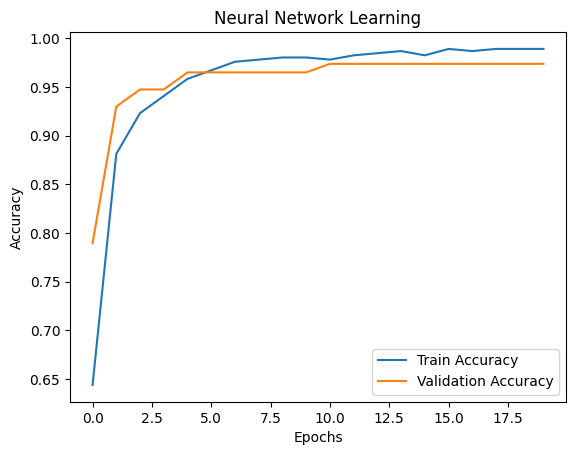

In [71]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

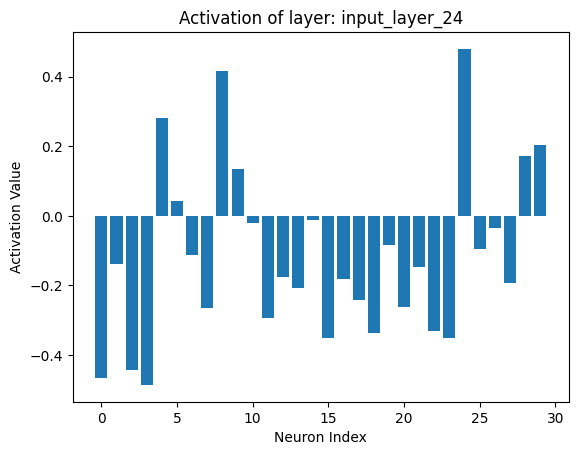

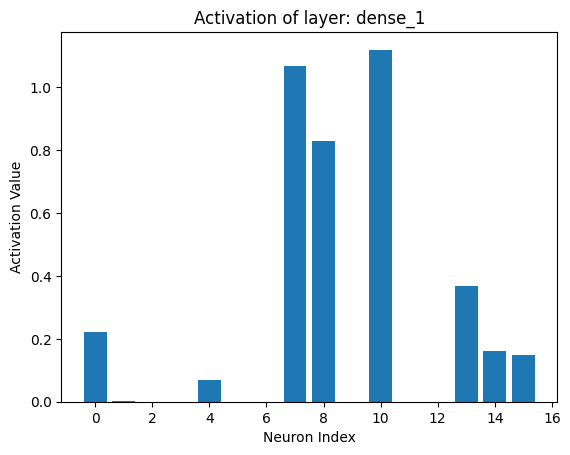

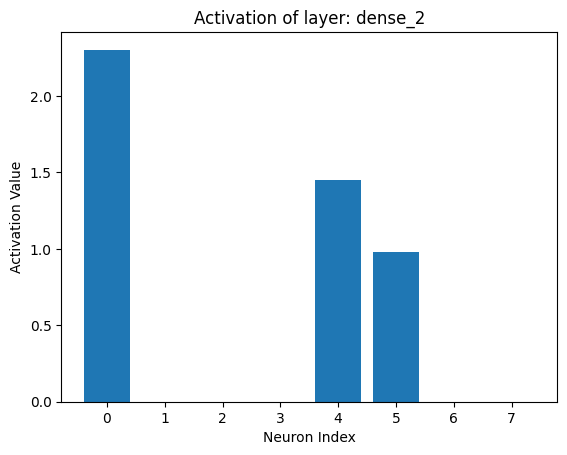

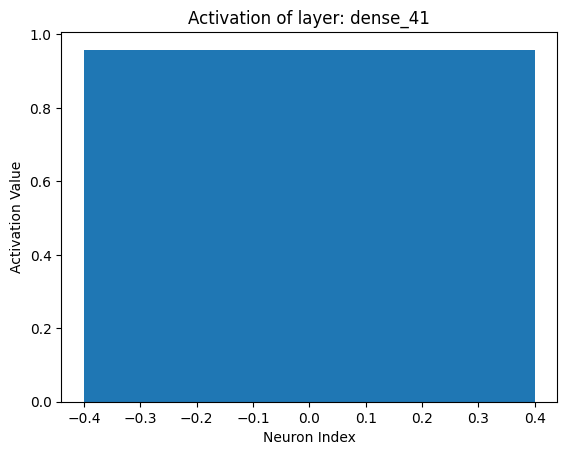

In [73]:
layer_names = [layer.name for layer in model.layers]
for i, activation in enumerate(activations):
    plt.figure()
    plt.bar(range(activation.shape[-1]), activation.flatten())
    plt.title(f'Activation of layer: {layer_names[i]}')
    plt.xlabel('Neuron Index')
    plt.ylabel('Activation Value')
    plt.show()
